In [11]:
import pandas as pd 

In [12]:
df = pd.read_csv('cleaned_enron.csv')
print(df.head())

   Unnamed: 0                      file  \
0           1    allen-p/_sent_mail/10.   
1           2   allen-p/_sent_mail/100.   
2           4  allen-p/_sent_mail/1001.   
3           5  allen-p/_sent_mail/1002.   
4           7  allen-p/_sent_mail/1004.   

                                             message                 date  \
0  Message-ID: <15464986.1075855378456.JavaMail.e...  04-05-2001 13:51:00   
1  Message-ID: <24216240.1075855687451.JavaMail.e...  18-10-2000 03:00:00   
2  Message-ID: <30922949.1075863688243.JavaMail.e...  31-08-2000 05:07:00   
3  Message-ID: <30965995.1075863688265.JavaMail.e...  31-08-2000 04:17:00   
4  Message-ID: <17189699.1075863688308.JavaMail.e...  14-07-2000 06:59:00   

                        subject    X-Folder           X-From  \
0                           Re:  'sent mail  Phillip K Allen   
1                      Re: test  'sent mail  Phillip K Allen   
2                     Re: Hello  'sent mail  Phillip K Allen   
3                     

In [110]:
employees = df['employee'].unique()

In [5]:
emailDict = {} #this creates a dictionary of employees, and the amount of emails tied to them in the dataset
for i in range(len(employees)):
    employeeRecord = df.loc[df['employee'] == employees[i]]
    employeeEmail = list(employeeRecord['body'])
    print(str(employees[i]), len(employeeEmail))
    emailDict[employees[i]] = employeeEmail


allen-p 2172
arnold-j 3827
arora-h 626
badeer-r 817
bailey-s 469
bass-e 7203
baughman-d 2652
beck-s 11570
benson-r 737
blair-l 2285
brawner-s 1001
buy-r 2357
campbell-l 6184
carson-m 1295
cash-m 2893
causholli-m 903
corman-s 1893
crandell-s 504
cuilla-m 950
dasovich-j 26475
davis-d 2093
dean-c 2362
delainey-d 3354
derrick-j 1608
dickson-s 384
donoho-l 1022
donohoe-t 967
dorland-c 1712
ermis-f 1211
farmer-d 12850
fischer-m 1482
forney-j 703
fossum-d 4558
gang-l 571
gay-r 1360
geaccone-t 1542
germany-c 11956
gilbertsmith-d 550
giron-d 4112
griffith-j 2758
grigsby-m 2188
guzman-m 5945
haedicke-m 4880
hain-m 3627
harris-s 530
hayslett-r 2322
heard-m 1608
hendrickson-s 714
hernandez-j 3141
hodge-j 1618
holst-k 454
horton-s 2443
hyatt-k 1672
hyvl-d 3180
jones-t 19742
kaminski-v 27326
kean-s 23561
keavey-p 2077
keiser-k 1074
king-j 448
kitchen-l 5177
kuykendall-t 1016
lavorato-j 3597
lay-k 5717
lenhart-m 5167
lewis-a 2134
linder-e 2796
lokay-m 5401
lokey-t 1124
love-p 4867
lucci-p 936
maggi-m

In [109]:
#emailDict['ward-k']

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [32]:
sentimentScore = {}

In [33]:

for employee in employees: #this function was created to average the sentiment score of each employee and put that into a dictionary

    avgSentiment = 0
    sender = employee
    for emails in emailDict[sender]:
        emailScore = sid.polarity_scores(emails)
        avgSentiment += emailScore['compound']
    employeeFinal = avgSentiment / len(emails)
    sentimentScore[sender] = employeeFinal

print(sentimentScore)

    

{'allen-p': 2.1024773265651406, 'arnold-j': 0.6442310451977387, 'arora-h': 0.9982235164835173, 'badeer-r': 9.795558139534878, 'bailey-s': 0.5466083743842366, 'bass-e': 10.151537735849077, 'baughman-d': 0.5010865264354729, 'beck-s': 4.530224986876669, 'benson-r': 2.7236933333333315, 'blair-l': 1.164220027816407, 'brawner-s': 19.009613333333334, 'buy-r': 3.6370322666666586, 'campbell-l': 3.0091892055267726, 'carson-m': 7.154578160919547, 'cash-m': 1.1075754303599343, 'causholli-m': 2.283837719298249, 'corman-s': 1.1445650722021654, 'crandell-s': 0.17799970501474904, 'cuilla-m': 0.8433706314243739, 'dasovich-j': 9.779518822170827, 'davis-d': 1.15008884955752, 'dean-c': 2.0459240776698975, 'delainey-d': 3.006034765100655, 'derrick-j': 8.416912230215823, 'dickson-s': 0.08376277850589778, 'donoho-l': 5.355044262295077, 'donohoe-t': 2.324885984848487, 'dorland-c': 4.338851479289941, 'ermis-f': 7.129686111111113, 'farmer-d': 11.405187707641335, 'fischer-m': 0.4319723173515984, 'forney-j': 1.38

In [34]:
newDict = sentimentScore # after finding this, we can see who had the most 'positive' emails and the most 'negative' emails

In [37]:
print(sorted((newDict)))

['allen-p', 'arnold-j', 'arora-h', 'badeer-r', 'bailey-s', 'bass-e', 'baughman-d', 'beck-s', 'benson-r', 'blair-l', 'brawner-s', 'buy-r', 'campbell-l', 'carson-m', 'cash-m', 'causholli-m', 'corman-s', 'crandell-s', 'cuilla-m', 'dasovich-j', 'davis-d', 'dean-c', 'delainey-d', 'derrick-j', 'dickson-s', 'donoho-l', 'donohoe-t', 'dorland-c', 'ermis-f', 'farmer-d', 'fischer-m', 'forney-j', 'fossum-d', 'gang-l', 'gay-r', 'geaccone-t', 'germany-c', 'gilbertsmith-d', 'giron-d', 'griffith-j', 'grigsby-m', 'guzman-m', 'haedicke-m', 'hain-m', 'harris-s', 'hayslett-r', 'heard-m', 'hendrickson-s', 'hernandez-j', 'hodge-j', 'holst-k', 'horton-s', 'hyatt-k', 'hyvl-d', 'jones-t', 'kaminski-v', 'kean-s', 'keavey-p', 'keiser-k', 'king-j', 'kitchen-l', 'kuykendall-t', 'lavorato-j', 'lay-k', 'lenhart-m', 'lewis-a', 'linder-e', 'lokay-m', 'lokey-t', 'love-p', 'lucci-p', 'maggi-m', 'mann-k', 'martin-t', 'may-l', 'mccarty-d', 'mcconnell-m', 'mckay-b', 'mckay-j', 'mclaughlin-e', 'merriss-s', 'meyers-a', 'mims

In [38]:
{name: sent for name, sent in sorted(newDict.items(), key=lambda item: item[1])} #sorted dictionary 

{'meyers-a': -0.4356413646055436,
 'solberg-g': -0.18842362948960262,
 'south-s': 0.032623701578192235,
 'phanis-s': 0.03359147286821706,
 'king-j': 0.05847194943202636,
 'dickson-s': 0.08376277850589778,
 'zufferli-j': 0.08388375744450459,
 'platter-p': 0.0919775280898877,
 'lenhart-m': 0.12684642802391485,
 'storey-g': 0.146237545620438,
 'thomas-p': 0.170803360987024,
 'crandell-s': 0.17799970501474904,
 'semperger-c': 0.20169293556085918,
 'steffes-j': 0.21907317259854506,
 'ybarbo-p': 0.2287134609350488,
 'sanchez-m': 0.22889535519125687,
 'staab-t': 0.24680988296488954,
 'pimenov-v': 0.24891416342412429,
 'holst-k': 0.2715784810126586,
 'saibi-e': 0.2723855798192773,
 'swerzbin-m': 0.2931466858789625,
 'schwieger-j': 0.3088652141247181,
 'whitt-m': 0.3102164988814317,
 'zipper-a': 0.31048361839604705,
 'gilbertsmith-d': 0.32017825295723396,
 'panus-s': 0.3243322085889576,
 'geaccone-t': 0.3282956047381545,
 'lucci-p': 0.3399271194379392,
 'slinger-r': 0.34516395348837203,
 'ring-

In [40]:
# user with lowest score: meyers-a
# user with highest wolfe-j
print(newDict['lay-k']) #this was the CEO of Enron at the time

4.203185211995911


In [79]:
import networkx as nx
import matplotlib.pyplot as plt

In [107]:
meyersA = df.loc[df['employee'] == 'meyers-a'] 
meyersSentTo = list(meyersA['X-To'])

In [51]:
#creating a graph to see connections between meyers and other contacts
meyersConnections = nx.Graph()

In [106]:
#creating a dictionary from list to get number of times A Meyers contacted a specific person
meyersEdgeDict = {}
for val in meyersSentTo:
    count = 1
    if val not in meyersEdgeDict.keys():
        meyersEdgeDict[val] = count
    else:
        count += 1
        meyersEdgeDict[val] = count


In [85]:
for val in meyersEdgeDict.keys():
   meyersConnections.add_node(val)
meyersConnections.add_node("MEYERS A",color='red')


In [105]:
for recip, weight in meyersEdgeDict.items():
    meyersConnections.add_edge("MEYERS A", recip)

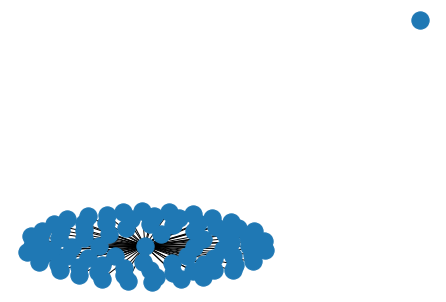

In [100]:
nx.draw(meyersConnections)

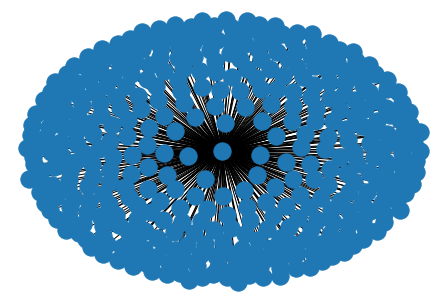

In [104]:
wolfeJ = df.loc[df['employee'] == 'wolfe-j'] #again creating a graph, except with J wolfe. This visualization is pretty useless but I thought it was interesting to do/try. 
wolfeSentTo = list(wolfeJ['X-To'])

wolfeConnections = nx.Graph()

wolfeEdgeDict = {}
for val in wolfeSentTo:
    count = 1
    if val not in wolfeEdgeDict.keys():
        wolfeEdgeDict[val] = count
    else:
        count += 1
        wolfeEdgeDict[val] = count

for val in wolfeEdgeDict.keys():
   wolfeConnections.add_node(val)
wolfeConnections.add_node("WOLFE J",color='red')

for recip, weight in wolfeEdgeDict.items():
    wolfeConnections.add_edge("WOLFE J", recip)
nx.draw(wolfeConnections)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [16]:
sample = df.sample(n=100000)

emailBody = sample['body']
emailAuthor = sample['employee']

emailSent = []
for item in list(emailAuthor): #here I'm running a logistic regression model to try to compare the employee and the sentiment score of an email body.
    emailScore = sid.polarity_scores(item)
    emailSent.append(emailScore['compound'])


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y)
lm = LogisticRegression()
log_reg = lm.fit(X_train, Y_train.ravel())
log_pred = log_reg.predict(X_test)

accuracy = metrics.accuracy_score(Y_test, log_pred)
print(accuracy) #not very accurate.